In [93]:
import math                           # allows the use of basic mathematical functions
import calendar                       # useful library if you want to do some basic calendar manipulations (selecting specific days for example)
import numpy as np                    # useful library to use for array manipulation
import matplotlib.pyplot as plt       # used to make plots in python
import matplotlib.dates as mdates     # used to work with dates in our figures
import pandas as pd                   # easy to use data manipulation library (also easiest way to read in standard data)
import seaborn as sns                 # use seaborn style defaults 
import cartopy                        # cartopy is the library that enables us to plot world/regional maps
import cartopy.crs as ccrs            # selecting the Cartopy Coordinate Reference Systems (projection of the map)
import cartopy.feature as cfeature    # adding features to the map

#set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
%matplotlib inline

In [81]:
df = pd.read_csv('PM25/GB_6001_68647_2020_timeseries.csv')

In [82]:
print(df.columns.values)

['Countrycode' 'Namespace' 'AirQualityNetwork' 'AirQualityStation'
 'AirQualityStationEoICode' 'SamplingPoint' 'SamplingProcess' 'Sample'
 'AirPollutant' 'AirPollutantCode' 'AveragingTime' 'Concentration'
 'UnitOfMeasurement' 'DatetimeBegin' 'DatetimeEnd' 'Validity'
 'Verification']


In [83]:
df.head()

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,AveragingTime,Concentration,UnitOfMeasurement,DatetimeBegin,DatetimeEnd,Validity,Verification
0,GB,http://environment.data.gov.uk/air-quality/so,GB_Network_1,Station_GB1098A,GB1098A,GB_SamplingPoint_76783,GB_StationProcess_7496,GB_SamplingFeature_786282,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,10.189,µg/m3,2020-01-02 01:00:00 +01:00,2020-01-02 02:00:00 +01:00,1,2
1,GB,http://environment.data.gov.uk/air-quality/so,GB_Network_1,Station_GB1098A,GB1098A,GB_SamplingPoint_76783,GB_StationProcess_7496,GB_SamplingFeature_786282,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,8.679,µg/m3,2020-01-02 02:00:00 +01:00,2020-01-02 03:00:00 +01:00,1,2
2,GB,http://environment.data.gov.uk/air-quality/so,GB_Network_1,Station_GB1098A,GB1098A,GB_SamplingPoint_76783,GB_StationProcess_7496,GB_SamplingFeature_786282,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,9.340,µg/m3,2020-01-02 03:00:00 +01:00,2020-01-02 04:00:00 +01:00,1,2
3,GB,http://environment.data.gov.uk/air-quality/so,GB_Network_1,Station_GB1098A,GB1098A,GB_SamplingPoint_76783,GB_StationProcess_7496,GB_SamplingFeature_786282,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,9.340,µg/m3,2020-01-02 04:00:00 +01:00,2020-01-02 05:00:00 +01:00,1,2
4,GB,http://environment.data.gov.uk/air-quality/so,GB_Network_1,Station_GB1098A,GB1098A,GB_SamplingPoint_76783,GB_StationProcess_7496,GB_SamplingFeature_786282,PM2.5,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,hour,9.340,µg/m3,2020-01-02 05:00:00 +01:00,2020-01-02 06:00:00 +01:00,1,2


In [84]:
df.dtypes

Countrycode                  object
Namespace                    object
AirQualityNetwork            object
AirQualityStation            object
AirQualityStationEoICode     object
SamplingPoint                object
SamplingProcess              object
Sample                       object
AirPollutant                 object
AirPollutantCode             object
AveragingTime                object
Concentration               float64
UnitOfMeasurement            object
DatetimeBegin                object
DatetimeEnd                  object
Validity                      int64
Verification                  int64
dtype: object

In [85]:
#convert dates to plottable format
df['Date']=pd.to_datetime(df['DatetimeBegin'])
df = df.sort_values(by="Date")
df = df.set_index('Date')

In [86]:
df.shape

(8732, 17)

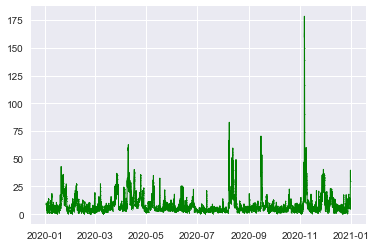

In [94]:
fig, ax = plt.subplots()
ax.plot(df['Concentration'], marker = '.', markersize = 1, color = 'g', linestyle = '-' ,linewidth = 1)

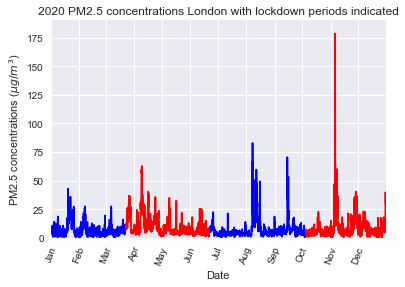

In [139]:
fig, ax = plt.subplots()
ax.plot(df.loc['2020-01-01':'2020-03-22','Concentration'], color = 'b')
ax.plot(df.loc['2020-03-23':'2020-06-22','Concentration'], color = 'r', label = 'First lockdown')
ax.plot(df.loc['2020-06-23':'2020-10-04','Concentration'], color = 'b')
ax.plot(df.loc['2020-10-05':'2020-12-31','Concentration'], color = 'r', label = 'Second lockdown')
ax.set_ylim([0, 190])
ax.set_ylabel('PM2.5 concentrations ($\mu g / m^3$)')
ax.set_xlabel('Date')
ax.set_title('2020 PM2.5 concentrations London with lockdown periods indicated')
ax.set_xlim(['2020','2020-12-31'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));
ax.tick_params(axis='x', rotation=70)


In [137]:
df.describe()

,Concentration,Validity,Verification
count,8712.000000,8732.000000,8732.0
mean,8.150735,1.261796,2.0
std,8.994338,0.455000,0.0
min,0.283000,-1.000000,2.0
25%,3.679000,1.000000,2.0
50%,5.566000,1.000000,2.0
75%,9.057000,2.000000,2.0
max,178.491000,2.000000,2.0


In [189]:
means = pd.DataFrame([df.loc['2020-01', 'Concentration'].mean(), df.loc['2020-02', 'Concentration'].mean(), 
         df.loc['2020-03', 'Concentration'].mean(), df.loc['2020-04', 'Concentration'].mean(), 
         df.loc['2020-05', 'Concentration'].mean(), df.loc['2020-06', 'Concentration'].mean(), 
         df.loc['2020-07', 'Concentration'].mean(), df.loc['2020-08', 'Concentration'].mean(), 
         df.loc['2020-09', 'Concentration'].mean(), df.loc['2020-10', 'Concentration'].mean(), 
         df.loc['2020-11', 'Concentration'].mean(), df.loc['2020-12', 'Concentration'].mean(), 
        ])

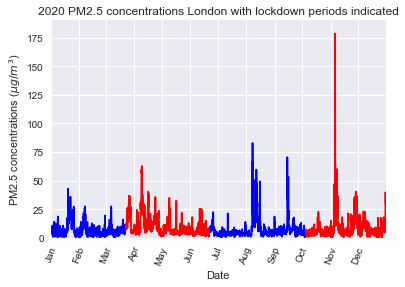

In [165]:
fig, ax = plt.subplots()
ax.plot(df.loc['2020-01-01':'2020-03-22','Concentration'], color = 'b')
ax.plot(df.loc['2020-03-23':'2020-06-22','Concentration'], color = 'r', label = 'First lockdown')
ax.plot(df.loc['2020-06-23':'2020-10-04','Concentration'], color = 'b')
ax.plot(df.loc['2020-10-05':'2020-12-31','Concentration'], color = 'r', label = 'Second lockdown')
ax.set_ylim([0, 190])
ax.set_ylabel('PM2.5 concentrations ($\mu g / m^3$)')
ax.set_xlabel('Date')
ax.set_title('2020 PM2.5 concentrations London with lockdown periods indicated')
ax.set_xlim(['2020','2020-12-31'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));
ax.tick_params(axis='x', rotation=70)


In [223]:
means['Date'] = pd.date_range(start='2020-01-01', periods = 12, freq = 'M')

In [224]:
means = means.set_index('Date')

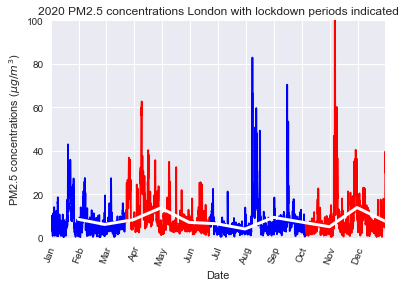

In [235]:
fig, ax = plt.subplots()
ax.plot(df.loc['2020-01-01':'2020-03-22','Concentration'], color = 'b')
ax.plot(df.loc['2020-03-23':'2020-06-22','Concentration'], color = 'r', label = 'First lockdown')
ax.plot(df.loc['2020-06-23':'2020-10-04','Concentration'], color = 'b')
ax.plot(df.loc['2020-10-05':'2020-12-31','Concentration'], color = 'r', label = 'Second lockdown')
ax.set_ylim([0, 100])
ax.set_ylabel('PM2.5 concentrations ($\mu g / m^3$)')
ax.set_xlabel('Date')
ax.set_title('2020 PM2.5 concentrations London with lockdown periods indicated')
ax.set_xlim(['2020','2020-12-31'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));
ax.tick_params(axis='x', rotation=70)
ax.plot(means, color='w', linewidth = 3)